In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [2]:
data = pd.read_csv('../input_data/GoogleStocks.csv', thousands=',')


In [3]:
print data.head()
data = data.drop(['close','open','date'],axis=1)

         date    close     volume     open       high       low
0       15:07  1169.41  1037784.0  1185.50  1187.5590  1159.370
1  2019/03/26  1184.62  1894639.0  1198.53  1202.8300  1176.720
2  2019/03/25  1193.00  1493841.0  1196.93  1206.3975  1187.040
3  2019/03/22  1205.50  1668910.0  1226.32  1230.0000  1202.825
4  2019/03/21  1231.54  1195899.0  1216.00  1231.7900  1213.150


In [4]:
print data.head()

      volume       high       low
0  1037784.0  1187.5590  1159.370
1  1894639.0  1202.8300  1176.720
2  1493841.0  1206.3975  1187.040
3  1668910.0  1230.0000  1202.825
4  1195899.0  1231.7900  1213.150


In [5]:
data['avg'] = (data.high + data.low)/2.0

In [6]:
data = data.drop(['high','low'],axis=1)
data = (data - data.mean())/data.std()


In [7]:
data.head()

,volume,avg
0,-0.807768,1.360413
1,0.443305,1.462796
2,-0.141890,1.506382
3,0.113724,1.630002
4,-0.576908,1.668025


In [8]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [9]:
def build_model2(cell,layers):
    d = 0.2
    model = Sequential()
    model.add(LSTM(cell, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
    model.add(LSTM(cell, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
    model.add(Dense(1,init='uniform',activation='relu'))
    model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
    return model

In [10]:
def build_model3(cell,layers):
    d = 0.2
    model = Sequential()
    model.add(LSTM(cell, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
    
    model.add(LSTM(cell, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
    
    model.add(LSTM(cell, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))

    model.add(Dense(1,init='uniform',activation='relu'))
    model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
    return model

In [11]:
# time_step = 5
# X_train, Y_train, X_test, Y_test = load_data(data[::-1],time_step)


In [12]:
# print X_train.shape

In [13]:
# model = build_model3(30,[2,time_step,1])

In [14]:
# model.fit(X_train, 
#           Y_train, 
#           batch_size=512, 
#           epochs=500, 
#           validation_split=0.1, 
#           verbose=0)

In [15]:
# trainScore = model.evaluate(X_train, Y_train, verbose=0)
# print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

# testScore = model.evaluate(X_test, Y_test, verbose=0)

# print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))


In [19]:
import matplotlib.pyplot as plt2

def plot(model,X_test,Y_test):

    p = model.predict(X_test)
    plt2.plot(p, label='prediction')
    plt2.plot(Y_test, label='y_test')
    plt2.legend()
    plt2.show()


In [20]:

def rnn(l,c,ts):
    print "for ",l," layers ",c," cells ",ts," time-steps"
    X_train, Y_train, X_test, Y_test = load_data(data[::-1],ts)
    if l==2:
        model = build_model2(c,[2,ts,1])
    elif l==3:
        model = build_model3(c,[2,ts,1])

    model.fit(X_train, 
          Y_train, 
          batch_size=512, 
          epochs=500, 
          validation_split=0.1, 
          verbose=0)
    
    trainScore = model.evaluate(X_train, Y_train, verbose=0)
    print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, Y_test, verbose=0)
    print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

    plot(model,X_test,Y_test)

for  2  layers  30  cells  20  time-steps


/home/priyendu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/priyendu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':


Train Score: 0.55 MSE (0.74 RMSE)
Test Score: 0.02 MSE (0.16 RMSE)


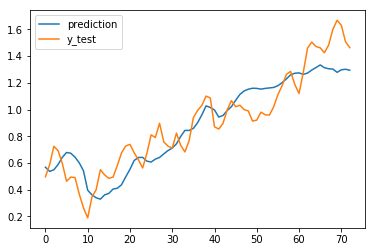

In [21]:
rnn(2,30,20)

for  2 30 20


/home/priyendu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/priyendu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':


Train Score: 0.55 MSE (0.74 RMSE)
Test Score: 0.03 MSE (0.17 RMSE)


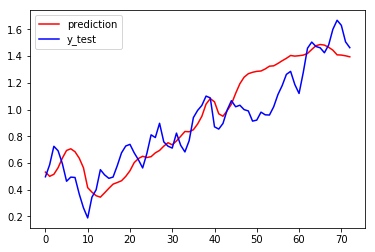

for  2 30 50
Train Score: 0.47 MSE (0.69 RMSE)
Test Score: 0.02 MSE (0.14 RMSE)


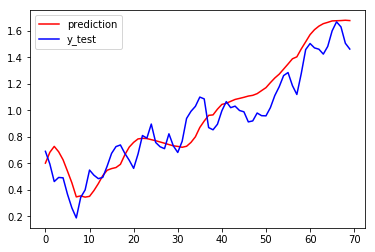

for  2 30 75
Train Score: 0.39 MSE (0.62 RMSE)
Test Score: 0.03 MSE (0.17 RMSE)


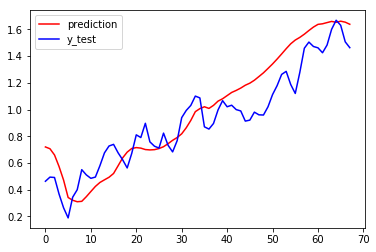

for  2 50 20
Train Score: 0.54 MSE (0.74 RMSE)
Test Score: 0.04 MSE (0.20 RMSE)


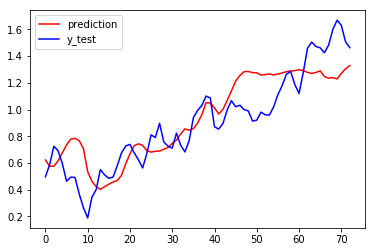

for  2 50 50
Train Score: 0.46 MSE (0.68 RMSE)
Test Score: 0.03 MSE (0.17 RMSE)


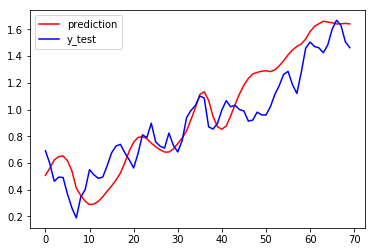

for  2 50 75
Train Score: 0.38 MSE (0.61 RMSE)
Test Score: 0.03 MSE (0.16 RMSE)


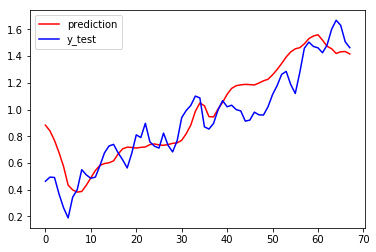

for  2 80 20
Train Score: 0.54 MSE (0.74 RMSE)
Test Score: 0.04 MSE (0.19 RMSE)


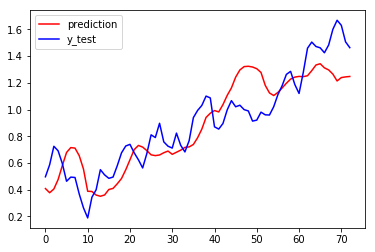

for  2 80 50
Train Score: 0.46 MSE (0.68 RMSE)
Test Score: 0.02 MSE (0.15 RMSE)


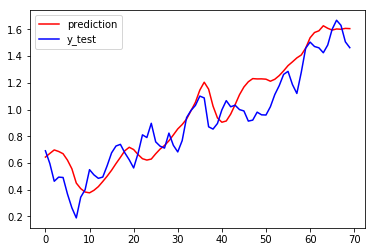

for  2 80 75
Train Score: 0.37 MSE (0.61 RMSE)
Test Score: 0.02 MSE (0.14 RMSE)


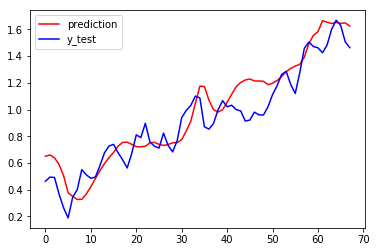

for  3 30 20


/home/priyendu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]


Train Score: 0.55 MSE (0.74 RMSE)
Test Score: 0.06 MSE (0.24 RMSE)


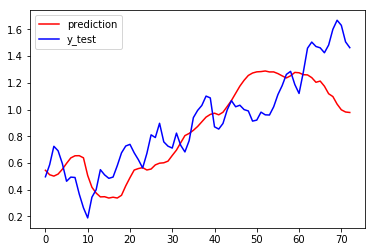

for  3 30 50
Train Score: 0.47 MSE (0.68 RMSE)
Test Score: 0.02 MSE (0.15 RMSE)


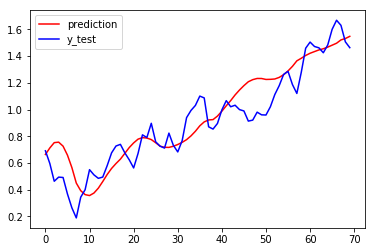

for  3 30 75
Train Score: 0.37 MSE (0.61 RMSE)
Test Score: 0.03 MSE (0.17 RMSE)


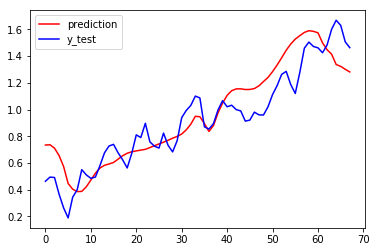

for  3 50 20
Train Score: 0.55 MSE (0.74 RMSE)
Test Score: 0.05 MSE (0.22 RMSE)


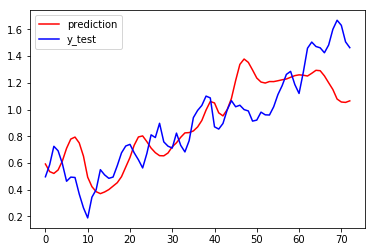

for  3 50 50
Train Score: 0.47 MSE (0.68 RMSE)
Test Score: 0.04 MSE (0.19 RMSE)


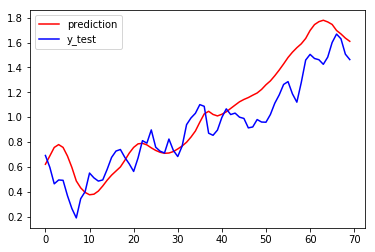

for  3 50 75
Train Score: 0.37 MSE (0.61 RMSE)
Test Score: 0.04 MSE (0.21 RMSE)


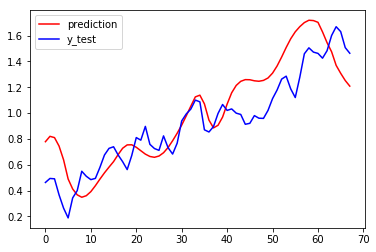

for  3 80 20
Train Score: 0.55 MSE (0.74 RMSE)
Test Score: 0.05 MSE (0.23 RMSE)


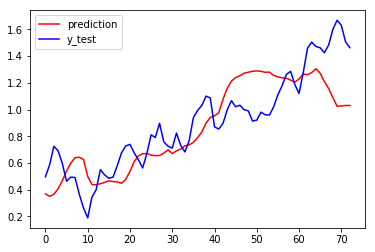

for  3 80 50
Train Score: 0.46 MSE (0.68 RMSE)
Test Score: 0.04 MSE (0.21 RMSE)


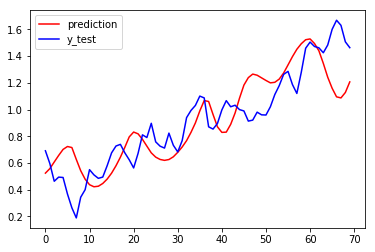

for  3 80 75
Train Score: 0.38 MSE (0.62 RMSE)
Test Score: 0.03 MSE (0.18 RMSE)


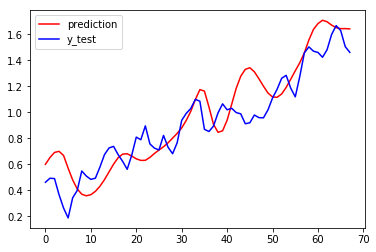

In [28]:
nhl = [2,3]
noc = [30,50,80]
nots = [20,50,75]

for l in nhl:
    for c in noc:
        for ts in nots:
            rnn(l,c,ts)